- presentation mode

In [1]:
# auf mistral
urlpath = '/pool/data/ICDC/ocean/hadisst1/DATA/HadISST_sst.nc'

In [2]:
!ls -all --block-size='MB' /pool/data/ICDC/ocean/hadisst1/DATA/HadISST_sst.nc

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
-rw-rw-r-- 1 u220001 icdc 464MB Apr 29 12:23 /pool/data/ICDC/ocean/hadisst1/DATA/HadISST_sst.nc


# netcdf-Datei öffnen
der harte Weg 🙄 

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
ds = Dataset(urlpath) 

[netcdf](https://www.unidata.ucar.edu/software/netcdf/) ist ein Datenformat selbstbeschreibender Daten.

In [5]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Title: Monthly version of HadISST sea surface temperature component
    description: HadISST 1.1 monthly average sea surface temperature
    institution: Met Office Hadley Centre
    source: HadISST
    reference: Rayner, N. A., Parker, D. E., Horton, E. B., Folland, C. K., Alexander, L. V., Rowell, D. P., Kent, E. C., Kaplan, A.  Global analyses of sea surface temperature, sea ice, and night marine air temperature since the late nineteenth century J. Geophys. Res.Vol. 108, No. D14, 4407 10.1029/2002JD002670
    Conventions: CF-1.0
    history: Mon Apr 29 12:23:08 2019: ncatted -a _FillValue,sst,m,f,-1000 HadISST_sst_original.nc HadISST_sst.nc
12/3/2019 converted to netcdf from pp format
    supplementary_information: Updates and supplementary information will be available from http://www.metoffice.gov.uk/hadobs/hadisst
    comment: Data restrictions: for academic research use only. Dat

In [6]:
ds.variables.keys()

odict_keys(['time', 'time_bnds', 'latitude', 'longitude', 'sst'])

In [7]:
sst = ds.variables['sst']
sst

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, latitude, longitude)
    _FillValue: -1000.0
    standard_name: sea_surface_temperature
    long_name: sst
    units: C
    cell_methods: time: lat: lon: mean
    missing_value: -1e+30
unlimited dimensions: time
current shape = (1789, 180, 360)
filling on

In [8]:
sst.size/1e6

115.9272

In [9]:
sst.shape

(1789, 180, 360)

In [10]:
time = ds.variables['time']
time

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: days since 1870-1-1 0:0:0
    calendar: gregorian
    long_name: Time
    standard_name: time
unlimited dimensions: time
current shape = (1789,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [11]:
last_timestep = sst[-1,:,:]
last_timestep

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., -1.7999999523162842, -1.7999999523162842, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ..., False, False,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-1000.0,
  dtype=float32)

In [12]:
type(last_timestep)

numpy.ma.core.MaskedArray

In [13]:
last_timestep.shape

(180, 360)

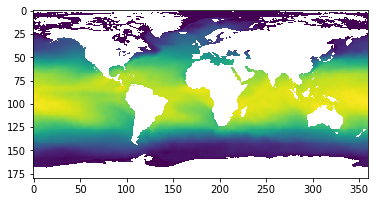

In [14]:
plt.imshow(last_timestep)

- aussageloser Plot
- welche Variable?
- welcher Zeitschritt?
- welche Einheit?
- wie plotte ich SST vom April 2014? 🤔

# xarray

In [4]:
import xarray as xr

In [16]:
ds = xr.open_dataset(urlpath)

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/conventions.py:401: SerializationWarning: variable 'sst' has multiple fill values {-1e+30, -1000.0}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


In [17]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1789)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-01-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    Mon Apr 29 12:23:08 2019: ncatted -a _FillVal...
    supplementary_information:  Updates and

In [18]:
ds['sst']

<xarray.DataArray 'sst' (time: 1789, latitude: 180, longitude: 360)>
[115927200 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-01-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [19]:
type(ds['sst'].values)

numpy.ndarray

In [20]:
# Dimensionen benennen die Axen
ds['sst'].dims

('time', 'latitude', 'longitude')

In [21]:
# Koordinaten beschreiben die Werte auf dem Grid
ds['sst'].coords

Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-01-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5

In [22]:
ds['sst'].attrs

OrderedDict([('standard_name', 'sea_surface_temperature'),
             ('long_name', 'sst'),
             ('units', 'C'),
             ('cell_methods', 'time: lat: lon: mean')])

In [23]:
ds['sst'].attrs['units']

'C'

## Intuitive API
wenn pandas bekannt

In [24]:
%%html
<iframe src="http://xarray.pydata.org/en/stable/api.html#indexing" width="1200" height="400"></iframe>

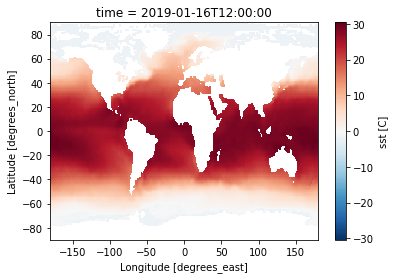

In [25]:
# nur xr.dataArray kann geplottet werden
ds.isel(time=-1)['sst'].plot()

## xarray.plot() versteht matplotlib API

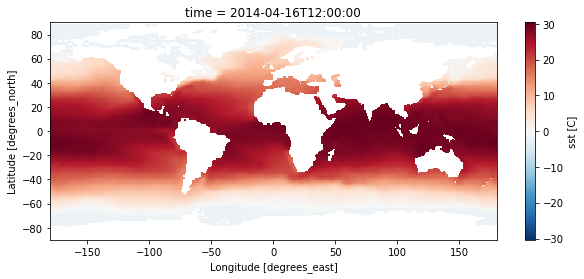

In [26]:
ds.sel(time='2014-04')['sst'].plot(figsize=(10,4))

## xarray kann mit cartopy Karten-Projektionen plotten

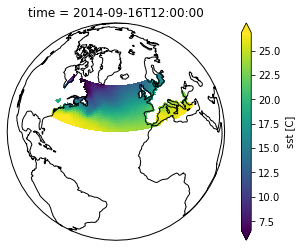

In [27]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.Orthographic(-30, 35))
ds.sel(time='2014-09',longitude=slice(-80,30),latitude=slice(60,35))['sst'].plot(ax=ax,
                                                                                 transform=ccrs.PlateCarree(),
                                                                                 robust=True)
ax.set_global()
ax.coastlines()

In [109]:
#slides xarray

## Beispiel: Ozeanerwärmung pro Breitengrad über die Zeit
als Daumenkino

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


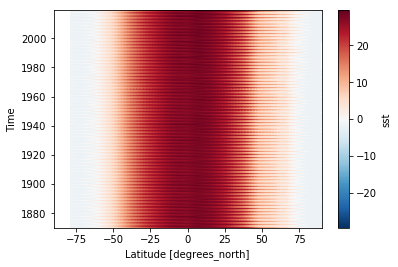

In [28]:
ds['sst'].mean('longitude').plot()

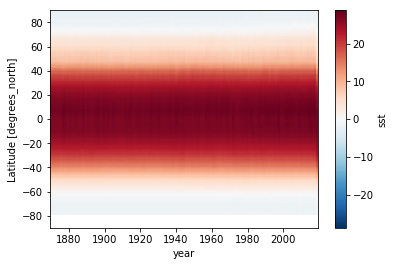

In [29]:
ds['sst'].groupby('time.year').mean('time').mean('longitude').T.plot()

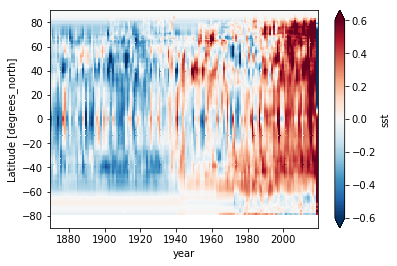

In [30]:
(ds['sst']-ds['sst'].mean('time')).groupby('time.year').mean('time').mean('longitude').T.plot(robust=True)

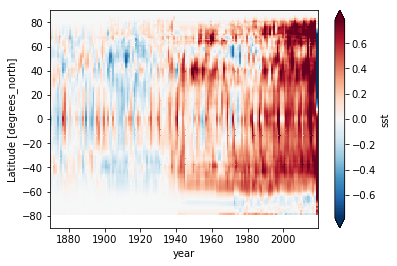

In [31]:
(ds['sst']-ds['sst'].sel(time=slice('1850','1900')).mean('time')).groupby('time.year').mean('time').mean('longitude').T.plot(robust=True)

In [32]:
# zurück zu Slides

## Woher sind die Ozeantemperaturschwankungen?
engl: internal variability

In [33]:
hadisst = ds['sst'].squeeze()

In [34]:
hadisst.nbytes/1e6,'MB'

(463.7088, 'MB')

In [35]:
hadisst.coords

Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-01-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5

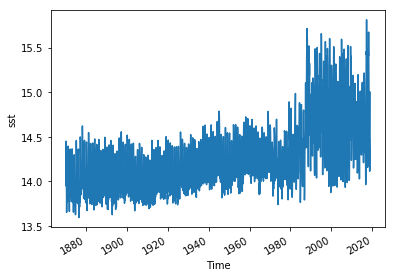

In [36]:
GMSST = hadisst.mean(['longitude','latitude'])
GMSST.plot()

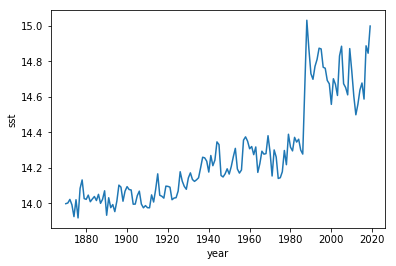

In [37]:
GMSST.groupby('time.year').mean('time').plot()

In [38]:
hadisst_ym = hadisst.groupby('time.year').mean('time')

In [39]:
hadisst_ym.nbytes/1e6,'MB'

(38.88, 'MB')

In [40]:
# 20-Jahres Mittelwert abziehen
hadisst_ym = hadisst_ym - hadisst_ym.rolling(year=20,center=True).mean()

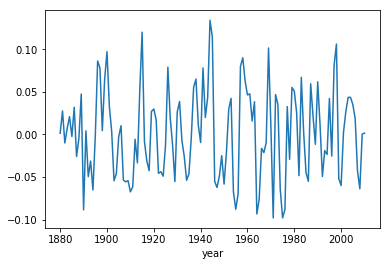

In [41]:
# nur Abweichungen vom Trend übrig
hadisst_ym.mean(['longitude','latitude']).plot()

In [42]:
# Standardabweichung als Inter-annual variability
hadisst_ym_std = hadisst_ym.std('year')

In [43]:
hadisst_ym_std.nbytes/1e6,'MB'

(0.2592, 'MB')

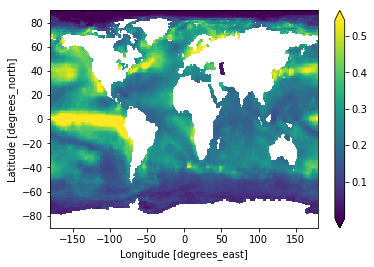

In [44]:
hadisst_ym_std.plot(robust=True)

In [111]:
def analysis1(da):
    da_ym = da.groupby('time.year').mean('time')
    da_ym_s = da_ym - da_ym.rolling(year=20,center=False).mean()
    da_ym_std = da_ym_s.std('year')
    return da_ym_std

CPU times: user 557 ms, sys: 49 ms, total: 606 ms
Wall time: 604 ms


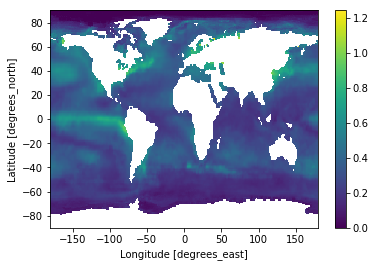

In [46]:
%time analysis1(hadisst).plot()

## next dataset MODIS-SST

- pro Jahr: 2.7 GB in 12 Files
- 2002 - 2019
- insgesamt ~120 GB: 
    - zu groß für Laptop
    - auch mistral braucht braucht lang

In [47]:
!ls -all --block-size='MB' /pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/2004

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
total 2689MB
drwxrwxr-x  2 u220001 icdc   1MB Jun  1  2017 .
drwxrwxr-x 19 u220001 icdc   1MB Jan 24 17:14 ..
-rwxrwxr-x  1 u220001 icdc 225MB Dec 21  2016 MODIS-AQUA__C6__SST_v2014.0__4km__2004001-2004031__UHAM-ICDC__fv0.01.nc
-rwxrwxr-x  1 u220001 icdc 225MB Dec 21  2016 MODIS-AQUA__C6__SST_v2014.0__4km__2004032-2004060__UHAM-ICDC__fv0.01.nc
-rwxrwxr-x  1 u220001 icdc 225MB Dec 21  2016 MODIS-AQUA__C6__SST_v2014.0__4km__2004061-2004091__UHAM-ICDC__fv0.01.nc
-rwxrwxr-x  1 u220001 icdc 225MB Dec 21  2016 MODIS-AQUA__C6__SST_v2014.0__4km__2004092-2004121__UHAM-ICDC__fv0.01.nc
-rwxrwxr-x  1 u220001 icdc 225MB Dec 21  2016 MODIS-AQUA__C6__SST_v2014.0__4km__2004122-2004152__UHAM-ICDC__fv0.01.nc
-rwxrwxr-x  1 u220001 icdc 225MB Dec 21  2016 MODIS-AQUA__C6__SST_v2014.0__4km__2004153-2004182__UHAM-ICDC__fv0.01.nc
-rwxrwxr-x  1 u220001 icdc 225MB Dec 21  2016 MODIS-

🔥 

In [48]:
# zurück zu den Slides

# dask

- xarray zeigt nicht den dask task graph
- daher random number example
- dask.array kann auch kein groupby
- zeigt dafür aber graphs

In [5]:
import dask.array

In [50]:
nschunks=2# 1 no spatial chunking
nssize=500
ntsize=500
ntchunks=2 # 1 no temporal chunking

In [51]:
#                               time,    lon,    lat
x = dask.array.random.random((ntsize, nssize, nssize), chunks=(ntsize/ntchunks, nssize/nschunks, nssize/nschunks))

In [52]:
x

dask.array<random_sample, shape=(500, 500, 500), dtype=float64, chunksize=(250, 250, 250)>

In [53]:
x.nbytes/1e6,'MB'

(1000.0, 'MB')

## Visualization des gechunkten Taskgraphen für die Standardabweichung

In [54]:
y = x[::12,:,:].std(axis=0)

In [55]:
y

dask.array<sqrt, shape=(500, 500), dtype=float64, chunksize=(250, 250)>

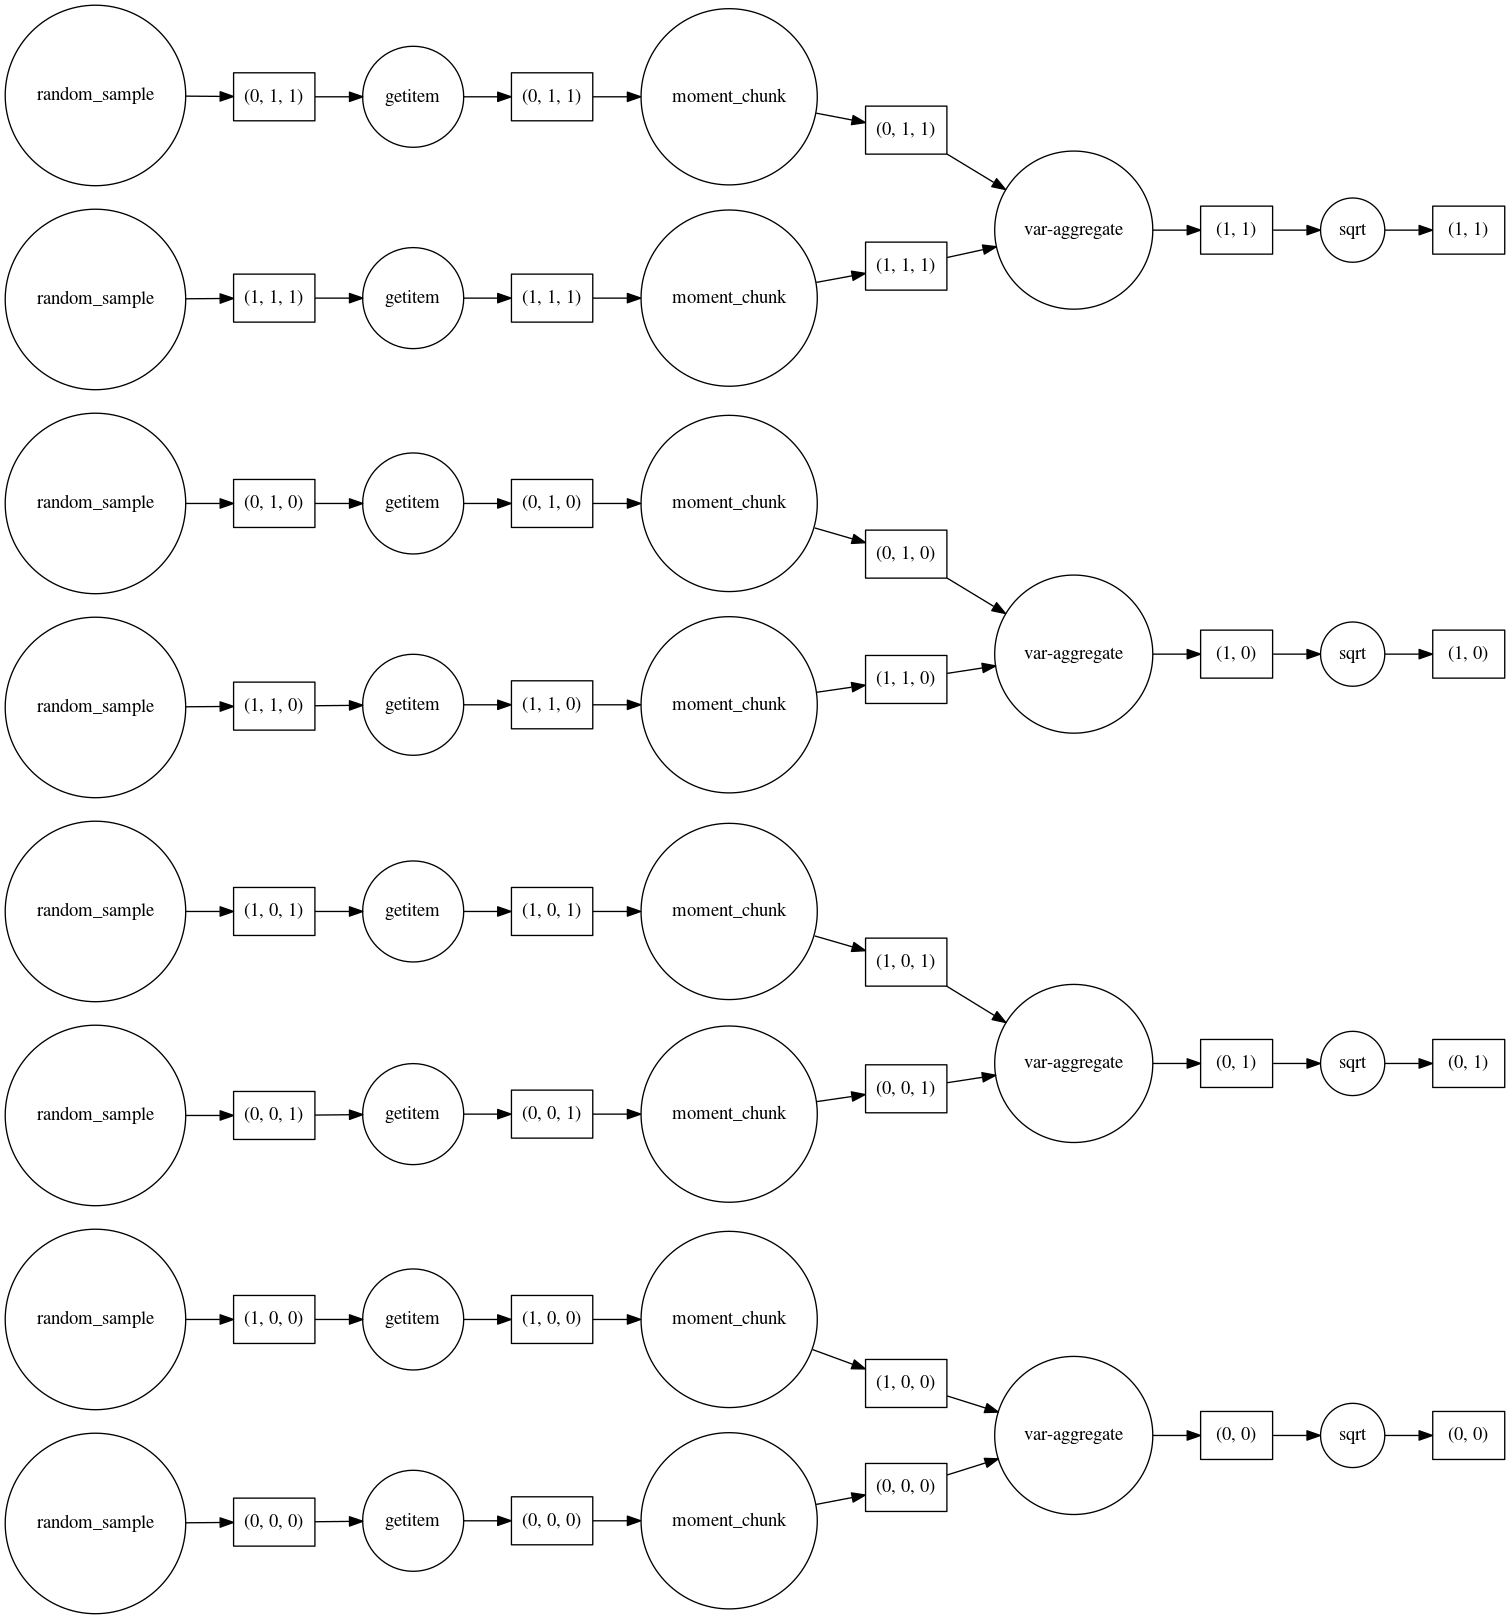

In [56]:
y.visualize(optimize_graph=False,rankdir='LR')

In [57]:
%time y=y.compute()
y.shape

CPU times: user 1.45 s, sys: 679 ms, total: 2.13 s
Wall time: 359 ms


(500, 500)

## Benchmarking
nur wenn genug Zeit

In [58]:
# ein Knoten hat 48/72 CPUs
import multiprocessing
multiprocessing.cpu_count()

72

In [59]:
from dask.distributed import Client
client = Client()

In [60]:
client

Client Scheduler: tcp://127.0.0.1:40775 Dashboard: http://localhost:8888/proxy/8787/status,Cluster Workers: 9 Cores: 72 Memory: 67.16 GB


In [61]:
nssize = 2 ** 10
ntsize = nssize#*10
nschunks = [2 ** i for i in range(4)]
ntchunks= list(np.arange(2, 11, 2)) + [16, 24, 36, 48]

In [62]:
nssize, ntsize, nschunks, ntchunks

(1024, 1024, [1, 2, 4, 8], [2, 4, 6, 8, 10, 16, 24, 36, 48])

In [63]:
x1 = dask.array.random.random((ntsize, nssize, nssize), chunks=(int(ntsize/1), int(nssize/1), int(nssize/1)))
x1.nbytes/1e9,'GB'

(8.589934592, 'GB')

In [64]:
import pandas as pd
Index = nschunks
Cols = ntchunks
df = pd.DataFrame(index=Index, columns=Cols)
df.index.name='spatial chunks'
df.columns.name='temporal chunks'

In [65]:
import time
from tqdm import tqdm_notebook
for s in tqdm_notebook(nschunks, desc='loop over spatial chunks'):
    for t in tqdm_notebook(ntchunks, leave=False, desc='loop over temporal chunks'):
        # create dask.array
        x = dask.array.random.random((ntsize, nssize, nssize), chunks=(int(ntsize/t), int(nssize/s), int(nssize/s)))
        # x in memory
        x = x.persist()
        # benchmarking starts
        start = time.time()
        y = x[::12,:,:].std(axis=0)
        y = y.compute()
        end = time.time()
        time_elapsed = end-start
        df[t][s] =t ime_elapsed
        del x, y
df = df.astype('float')

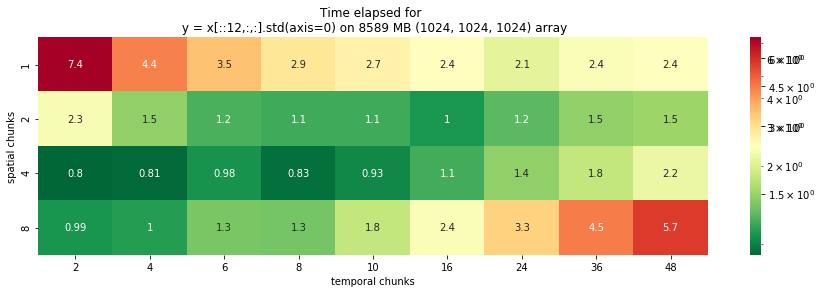

In [121]:
import seaborn as sns
import math
from matplotlib.colors import LogNorm
log_norm = LogNorm(vmin=df.min().min(), vmax=df.max().max())

fig,ax=plt.subplots(figsize=(15,4))
sns.heatmap(df,annot=True, cmap='RdYlGn_r',robust=False,norm=log_norm,ax=ax)
plt.title('Time elapsed for \n y = x[::12,:,:].std(axis=0) on '+str(int(x1.nbytes/1e6))+' MB '+str(x1.shape)+' array')
plt.show()

## ohne dask schneller bei kleinen Datenmengen

In [67]:
x1 = dask.array.random.random((ntsize, nssize, nssize), chunks=(int(ntsize/t), int(nssize/s), int(nssize/s)))
x1=x1.compute()
%time y=x1[::12,:,:].std(axis=0)

CPU times: user 576 ms, sys: 362 ms, total: 938 ms
Wall time: 820 ms


- dont chunk too much
- spatial chunks count double as applied on two dimensions

# xarray nutzt dask

In [68]:
ntchunksize=450

In [69]:
# xr.open_mfdataset oder xr.open_dataset(chunks={dict})
hadisst = xr.open_mfdataset(urlpath,chunks={'time':ntchunksize})['sst'].squeeze()

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/conventions.py:401: SerializationWarning: variable 'sst' has multiple fill values {-1e+30, -1000.0}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


In [70]:
hadisst

<xarray.DataArray 'sst' (time: 1789, latitude: 180, longitude: 360)>
dask.array<shape=(1789, 180, 360), dtype=float32, chunksize=(450, 180, 360)>
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-01-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [71]:
hadisst.chunks

((450, 450, 450, 439), (180,), (360,))

In [72]:
"chunksize",hadisst.chunks[0][0]*hadisst.chunks[1][0]*hadisst.chunks[2][0]/1e6,'MB'

('chunksize', 29.16, 'MB')

In [73]:
def analysis(da):
    da = da-da.rolling(time=12*20,center=False).mean()
    da_ym = da.groupby('time.year').mean('time')
    da_ym_std = da_ym.std('year')
    return da_ym_std

In [74]:
#
hadisst=hadisst.persist()

CPU times: user 5.2 s, sys: 474 ms, total: 5.67 s
Wall time: 20.2 s


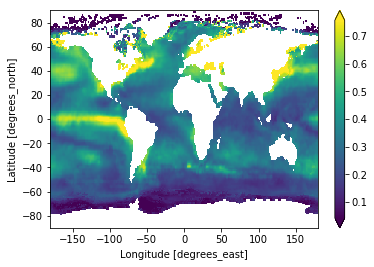

In [75]:
# kein gutes Beispiel, da chunks zu klein
%time analysis(hadisst).plot(robust=True)

## MODIS SST Satelitendaten

In [6]:
import xarray as xr
%matplotlib inline
modis_urlpath='/pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/*/MODIS-A*.nc'

In [22]:
nlat=int(4320/4)
nlon=int(8640/4)

In [23]:
nlat,nlon

(1080, 2160)

In [24]:
client.close()

In [25]:
from dask.distributed import Client
client = Client(n_workers=8)
client

Client Scheduler: tcp://127.0.0.1:45267 Dashboard: http://localhost:8888/proxy/8787/status,Cluster Workers: 8 Cores: 72 Memory: 67.16 GB


In [26]:
modis = xr.open_mfdataset(modis_urlpath, chunks={'time':-1,'lat':nlat,'lon':nlon})

In [27]:
print(modis.nbytes/1e9,'GB')
modis

118.245019824 GB


<xarray.Dataset>
Dimensions:       (lat: 4320, lon: 8640, time: 198)
Coordinates:
  * lat           (lat) float32 89.979164 89.9375 ... -89.93751 -89.97918
  * lon           (lon) float32 -179.97917 -179.9375 ... 179.93752 179.97917
  * time          (time) datetime64[ns] 2002-07-16 2002-08-16 ... 2018-12-16
Data variables:
    sst_night     (time, lat, lon) float32 dask.array<shape=(198, 4320, 8640), chunksize=(1, 1080, 2160)>
    sst_night_qf  (time, lat, lon) float32 dask.array<shape=(198, 4320, 8640), chunksize=(1, 1080, 2160)>
    sst_day       (time, lat, lon) float32 dask.array<shape=(198, 4320, 8640), chunksize=(1, 1080, 2160)>
    sst_day_qf    (time, lat, lon) float32 dask.array<shape=(198, 4320, 8640), chunksize=(1, 1080, 2160)>
Attributes:
    Conventions:                CF-1.6
    title:                      MODIS-AQUA Collection 5 monthly (mean) sea su...
    summary:                    MODIS-AQUA Collection 5 monthly (mean) sea su...
    institution:                Cente

In [28]:
modis_sst_day = modis['sst_day'].sel(time=slice('2003','2018'))

In [29]:
#modis_sst_day.chunks

In [30]:
modis_sst_day.nbytes/1e9,'GB'

(28.6654464, 'GB')

In [31]:
#modis_sst_day.persist()

### Snapshot von vor einem Jahr
nur die Daten Laden die man braucht

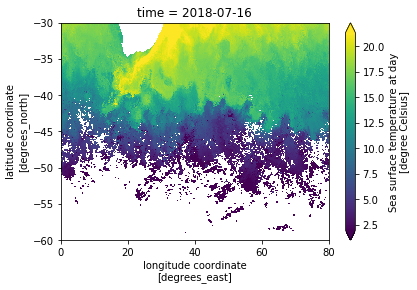

In [32]:
modis_sst_day.sel(time='2018-07').sel(lat=slice(-30,-60), lon=slice(0,80)).plot(robust=True)

### Interne Variabilität im Südlichen Ozean

In [33]:
# check whether useful or not
#modis_sst_day=modis_sst_day.chunk({'time':12})

In [34]:
# extrahieren SO
%time sub=modis_sst_day.sel(lat=slice(-30,-75))
sub.nbytes/1e9,'GB'

CPU times: user 9 ms, sys: 2 ms, total: 11 ms
Wall time: 8.61 ms


(7.1663616, 'GB')

In [35]:
# Jahresmittelwerte
%time sub=sub.groupby('time.year').mean('time')
sub.nbytes/1e9,'GB'

CPU times: user 191 ms, sys: 8 ms, total: 199 ms
Wall time: 189 ms


(0.5971968, 'GB')

In [36]:
# Std
%time sub=sub.std('year')
sub.nbytes/1e9,'GB'

CPU times: user 5 ms, sys: 0 ns, total: 5 ms
Wall time: 5.05 ms


(0.0373248, 'GB')

In [37]:
sub

<xarray.DataArray 'sst_day' (lat: 1080, lon: 8640)>
dask.array<shape=(1080, 8640), dtype=float32, chunksize=(360, 2160)>
Coordinates:
  * lat      (lat) float32 -30.020832 -30.062504 ... -74.93751 -74.97918
  * lon      (lon) float32 -179.97917 -179.9375 ... 179.93752 179.97917

In [38]:
# Berechnung
%time subc=sub.compute()

CPU times: user 8.76 s, sys: 936 ms, total: 9.7 s
Wall time: 13.8 s


Wall time vs. total time

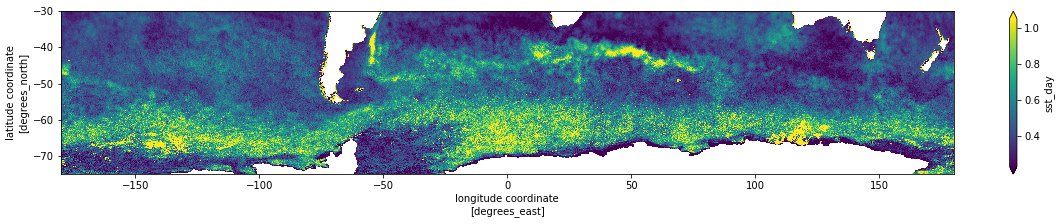

In [94]:
subc.plot(robust=True,figsize=(20,3))

### Vergleich Satellitendaten mit Reanalyse

In [117]:
def analysis(da):
    da_ym = da.groupby('time.year').mean('time')
    da_ym_std = da_ym.std('year')
    return da_ym_std

In [119]:
hadisst = xr.open_dataset(urlpath)['sst']

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/conventions.py:401: SerializationWarning: variable 'sst' has multiple fill values {-1e+30, -1000.0}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


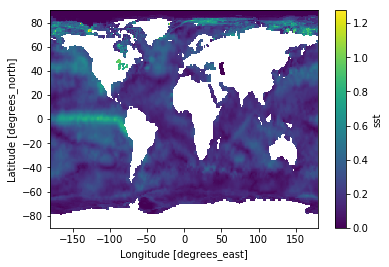

In [120]:
analysis(hadisst.sel(time=slice("2014","2018"))).plot()

- ab 60S häufig Wolken oder Meereis
- Reanalyse niedrige horizontale Auflösung: Eddies nicht aufgelöst

### xarray funktioniert mit matplotlib und cartopy

In [96]:
import cartopy as cp
import cartopy.crs as ccrs

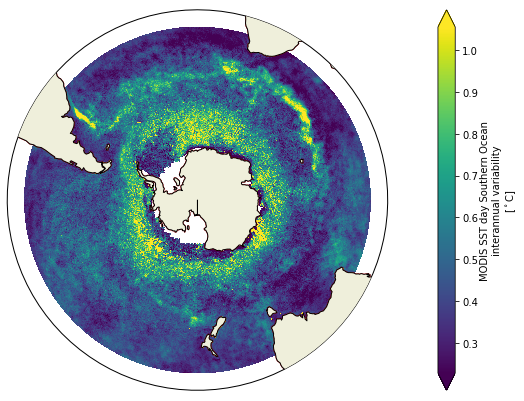

In [97]:
projection=ccrs.SouthPolarStereo(central_longitude=0.0)
plt.figure(figsize=(18, 7))
ax = plt.subplot(projection=projection)
subc.name='MODIS SST day Southern Ocean interannual variability [$^\circ$C]'
subc.plot.pcolormesh(
        'lon', 'lat', ax=ax, transform=ccrs.PlateCarree(),robust=True)

ax.coastlines(color='red')
ax.add_feature(cp.feature.LAND, zorder=100, edgecolor='k')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

In [98]:
# zurück zu Slides: Zusammenfassung

## SLURMCluster
dasselbe wie vorher nur auf mehreren Knoten verteilt

In [137]:
# nur wenn viel zu viel Zeit übrig
from dask.distributed import Client, LocalCluster
from dask_jobqueue import SLURMCluster

In [137]:
cluster = SLURMCluster()
cluster.scale(30)

In [ ]:
#cluster = LocalCluster(n_workers=16, threads_per_worker=1)

In [ ]:
!squeue -o "%.9i %.30j %.8u %.8T %.11M %.11l %.7D %.S" -u m300524

In [141]:
client = Client()
client

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


In [151]:
modis = xr.open_mfdataset(modis_urlpath, chunks={'time':-1,'lat':nlat,'lon':nlon})

Task was destroyed but it is pending!
task: <Task pending coro=<TCPClient.connect() running at /work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/tornado/tcpclient.py:270> wait_for=<Future finished result=[(<AddressFamily.AF_INET: 2>, ('127.0.0.1', 34373))]> cb=[IOLoop.add_future.<locals>.<lambda>() at /work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/tornado/ioloop.py:690]>
Task was destroyed but it is pending!
task: <Task pending coro=<TCPClient.connect() running at /work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/tornado/tcpclient.py:270> wait_for=<Future finished result=[(<AddressFamily.AF_INET: 2>, ('127.0.0.1', 34373))]> cb=[IOLoop.add_future.<locals>.<lambda>() at /work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/tornado/ioloop.py:690]>
Task was destroyed but it is pending!
task: <Task pending coro=<TCPClient.connect() running at /work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/tornado/tcpclien

In [152]:
modis_sst_day = modis['sst_day'].sel(time=slice('2003','2018'))

In [153]:
sub=modis_sst_day.sel(lat=slice(-30,-75))

In [ ]:
sub=sub.groupby('time.year').mean('time')

In [ ]:
sub=sub.std('year')

In [ ]:
%time subc=sub.compute()